In [32]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import math
from scipy import signal
from scipy.fftpack import fft , ifft
from scipy.signal import freqs, iirfilter
%matplotlib notebook

In [7]:
len(InputSignal_1kHz_15kHz)

320

Text(0.5, 0.98, 'Multiplots')

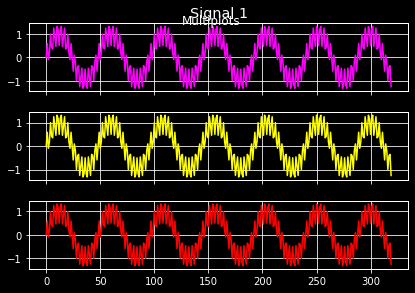

In [36]:
#Subplots creates more than one plot , it returns the plot and the array of plots 
style.use('dark_background')
f,plt_arr=plt.subplots(3 , sharex=True )
f.tight_layout()
plt_arr[0].plot(InputSignal_1kHz_15kHz , color='magenta')
plt_arr[1].plot(InputSignal_1kHz_15kHz , color='yellow')
plt_arr[2].plot(InputSignal_1kHz_15kHz , color='red')
plt_arr[0].set_title('Signal 1')
f.suptitle('Multiplots')

In [28]:
#Generate your signals
#1- sampling rate : kam sample fel second , linspace (start , end , size) "Sampling rate equiv of time"
#2- sin(2pi f t)
t=np.linspace(0 , 1.0 , 2001)
sig_5hz=np.sin(2 * np.pi * 5 * t)
sig_250hz=np.sin(2 * np.pi * 250 *t)
compined_signal=sig_5hz + sig_250hz

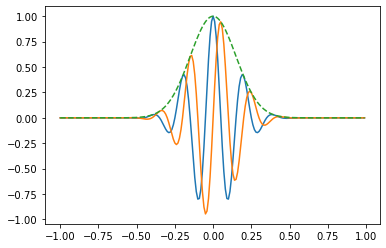

In [12]:
#generate gauss pulse
t=np.linspace(-1 , 1 , 200 , endpoint=False)
i,q,e=signal.gausspulse(t,fc=5,retquad=True,retenv=True)
plt.plot(t,i , t , q , t , e , '--')
plt.show()

<IPython.core.display.Javascript object>


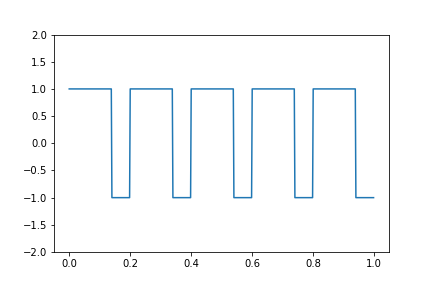

(-2.0, 2.0)

In [25]:
#Squarewave
t=np.linspace(0,1,500 , endpoint=False)
square_wave=signal.square(2*np.pi*5*t , duty=0.7)
plt.plot(t , square_wave)
plt.ylim(-2 , 2)

<IPython.core.display.Javascript object>


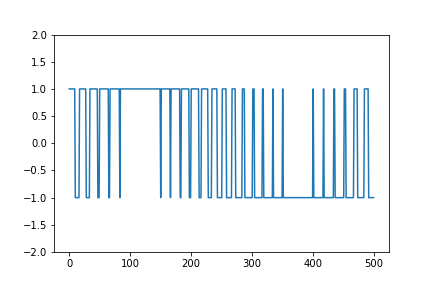

In [21]:
#Pulse width modulated sine wave , Sets the duty cycle : it's how long its high 
#Average=Vo(max)*duty cycle + (1-duty cycle)*Vmin
sine_sig=np.sin(2*np.pi*t)
pwm=signal.square(2*np.pi*30*t , duty=(sine_sig+1)/2)
plt.plot(pwm)

<IPython.core.display.Javascript object>


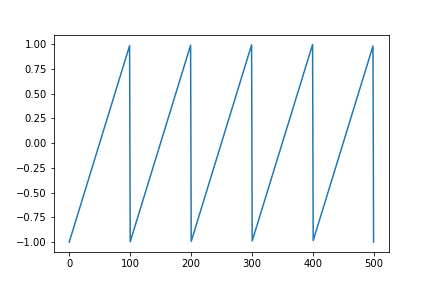

In [26]:
#Sawtooth
t=np.linspace(0,1,500)
saw=signal.sawtooth(2 * np.pi * 5 *t)
plt.plot(saw)

<IPython.core.display.Javascript object>


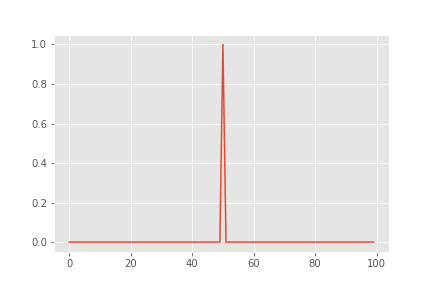

In [32]:
#Impulse (delta function)
imp = signal.unit_impulse(100, 'mid')
plt.plot(imp)

<IPython.core.display.Javascript object>


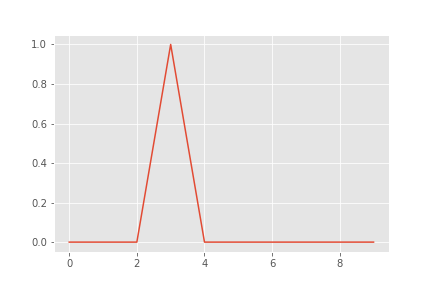

In [34]:
#Impulse
imp=signal.unit_impulse(10 , 3)
plt.plot(imp)

In [31]:
#Subplots creates more than one plot , it returns the plot and the array of plots 
style.use('ggplot')
f,plt_arr=plt.subplots(3 , sharex=True )
f.tight_layout()
f.set_figheight(5)
f.set_figwidth(5)
plt_arr[0].plot(sig_5hz , color='magenta' )
plt_arr[1].plot(sig_250hz , color='yellow')
plt_arr[2].plot(compined_signal , color='red')
f.suptitle('Multiplots')

<IPython.core.display.Javascript object>

Text(0.5, 0.98, 'Multiplots')

In [29]:
#Operations on signals
the_mean=np.mean(InputSignal_1kHz_15kHz)
the_variance=np.var(InputSignal_1kHz_15kHz)
the_variance
#Signal_to_Noise_Ratio=mean/standard_deviation

0.6182214651545005

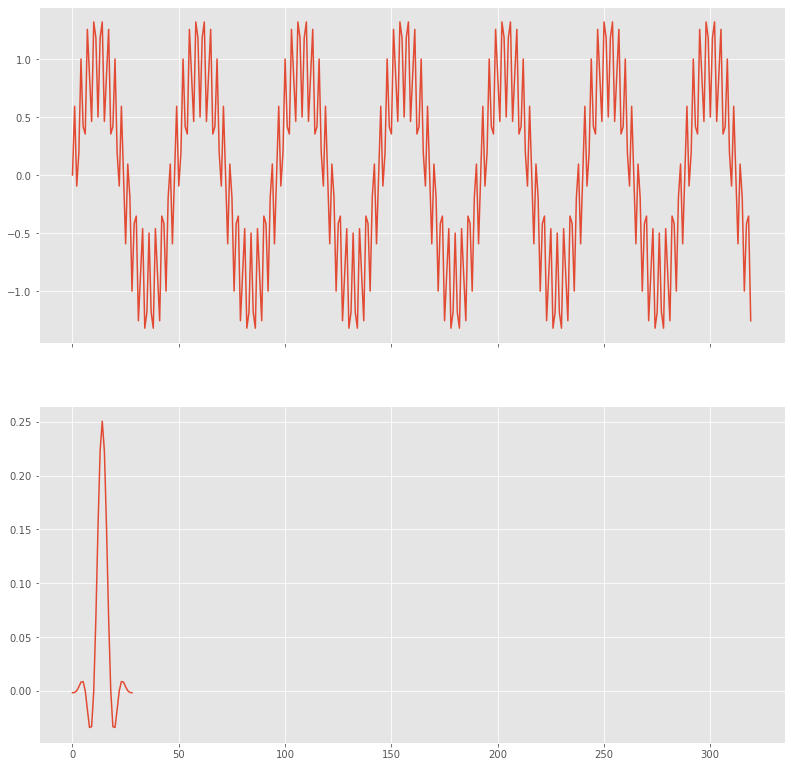

In [34]:
#New
f,arr=plt.subplots(2 , sharex=True)
style.use('ggplot')
f.tight_layout()
f.set_figheight(12)
f.set_figwidth(12)
arr[0].plot(InputSignal_1kHz_15kHz)
arr[1].plot(Impulse_Response)
plt.show()

In [39]:
#Convolution
output=signal.convolve(InputSignal_1kHz_15kHz , Impulse_Response , mode='same')


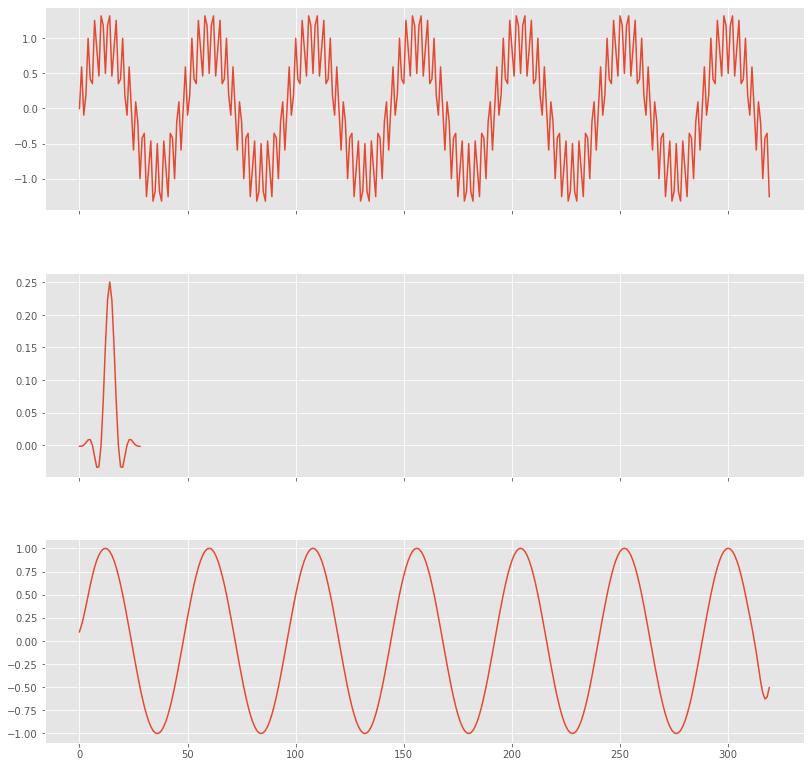

In [13]:
#New
f,arr=plt.subplots(3 , sharex=True)
style.use('ggplot')
f.tight_layout()
f.set_figheight(12)
f.set_figwidth(12)
arr[0].plot(InputSignal_1kHz_15kHz)
arr[1].plot(Impulse_response)
arr[2].plot(output)
plt.show()

In [ ]:
#Convolution theorem : conv in time == multiply by filter in freq 

In [3]:
import numpy as np
#convolution algorithm
def conv(sig1,sig2):
    output=np.zeros(len(sig1)+len(sig2))
    for i in range(len(sig1)):
        for y in range(len(sig2)):
            output[i+y]+=sig1[i]*sig2[y]
    return output

In [7]:
conv([1,2,3,4,5,6] , [1,1,1])

array([ 1.,  3.,  6.,  9., 12., 15., 11.,  6.,  0.])

In [8]:
from scipy import signal
signal.convolve([1,2,3,4,5,6] , [0,1,0] , mode='valid')

array([2, 3, 4, 5])

In [47]:
#Deconvolution
arr1=[0,0,0,1,1,1]
arr2=[1,1,0]
Convolution = signal.convolve(arr1 , arr2)
De_conv=signal.deconvolve(Convolution , arr2)

In [48]:
#Returns the signal
De_conv

(array([0., 0., 0., 1., 1., 1.]), array([0., 0., 0., 0., 0., 0., 0., 0.]))

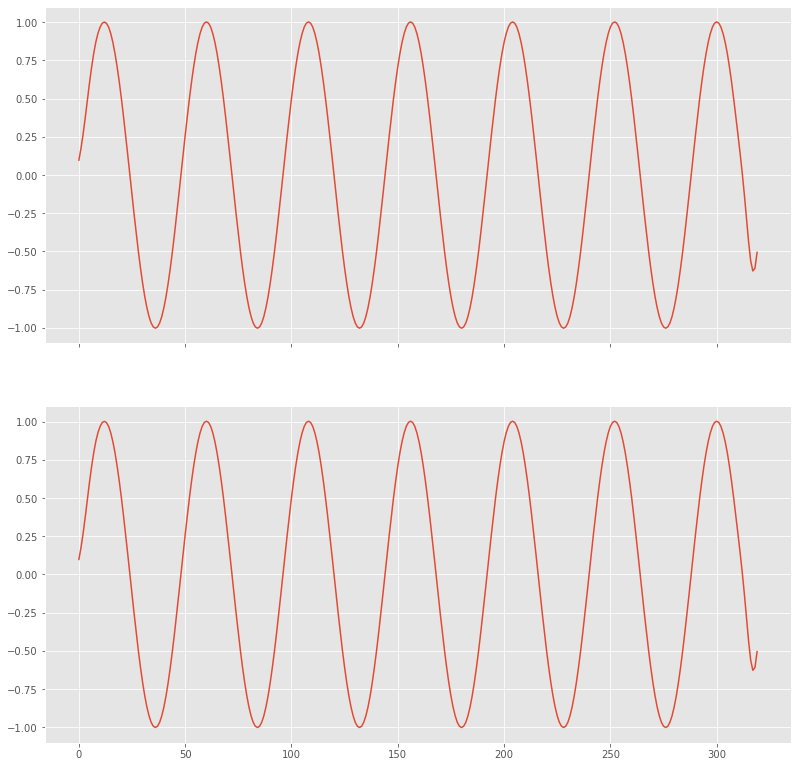

In [5]:
# Convolution == cross-correlation "the sliding dot product"
sigs=signal.correlate(InputSignal_1kHz_15kHz , Impulse_Response , mode='same')
conv=signal.convolve(InputSignal_1kHz_15kHz , Impulse_Response , mode='same')
#New
style.use('ggplot')
f,arr=plt.subplots(2 , sharex=True)
f.tight_layout()
f.set_figheight(12)
f.set_figwidth(12)
arr[0].plot(sigs)
arr[1].plot(conv)
plt.show()

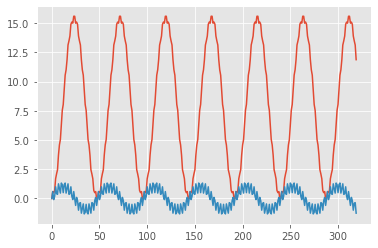

In [9]:
#First difference : y[n] = x[n] - x[n-1]
#Running sum : y[n] = x[n] + y[n-1]
running_sum=np.cumsum(InputSignal_1kHz_15kHz)
plt.plot(running_sum)
plt.plot(InputSignal_1kHz_15kHz )

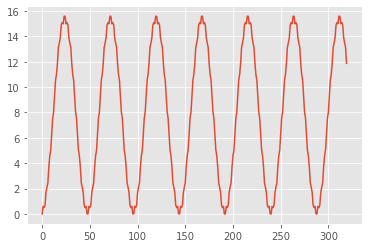

In [24]:
def calc_running_sum(signal):
    output=np.zeros(len(signal))
    for x in range(len(signal)):
        output[x] = output[x-1] + signal[x]
    return output
plt.plot(calc_running_sum(InputSignal_1kHz_15kHz))

In [25]:
#running sum gives the sum of all elements in array or sum from a - to - b as in the form of cum[6-->3] = cum[6] - cum[2-1]
calc_running_sum([1,2,3])[-1]

6.0

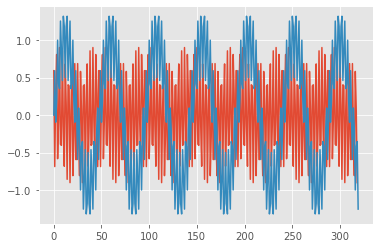

In [28]:
#First difference :
diff=np.diff(InputSignal_1kHz_15kHz)
plt.plot(diff)
plt.plot(InputSignal_1kHz_15kHz)

In [8]:
def calc_dft(signal):
    N_2=int(len(signal)/2)
    N=int(N_2 *2)
    
    real_part=np.zeros(N_2)
    imaginary_part=np.zeros(N_2)
    MAGNITUDE=np.zeros(N_2)
    for k in range(N_2):
        for i in range(N_2 *2):
            real_part[k]+= signal[i] * math.cos(2*math.pi * k * i /N)
            
            imaginary_part[k]-= signal[i] * math.sin(2*math.pi * k *i /N)
            
    for x in range(N_2):
        MAGNITUDE[x]=math.sqrt(math.pow(real_part[x] , 2)     + math.pow(imaginary_part[x] , 2)    )
    return  real_part , imaginary_part , MAGNITUDE

def calc_idft(real_part , imaginary_part):
    
    N=int(len(real_part) * 2)
    N_2 = int(N/2)
    signal=np.zeros(N)
    for i in range(N):
        for j in range(N_2):
            signal[i]+=real_part[j]/N * math.cos(2*math.pi *j * i / N)
            signal[i]+=imaginary_part[j]/N * math.sin(2*math.pi *j * i / N)
    return signal


Text(0.5, 0.98, 'Multiplots')

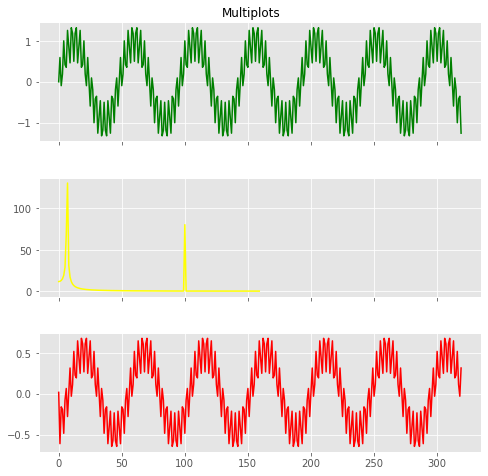

In [127]:
#Subplots creates more than one plot , it returns the plot and the array of plots 
real,imag,freq_comp=calc_dft(InputSignal_1kHz_15kHz)
idft=calc_idft(real , imag)
style.use('ggplot')
f,plt_arr=plt.subplots(3 , sharex=True )
f.tight_layout()
f.set_figheight(7)
f.set_figwidth(7)
plt_arr[0].plot(InputSignal_1kHz_15kHz , color='Green' )
plt_arr[1].plot(freq_comp , color='yellow')
plt_arr[2].plot(idft , color='red')
f.suptitle('Multiplots')

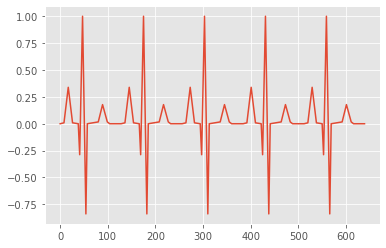

In [128]:
plt.plot(ecg_signal)

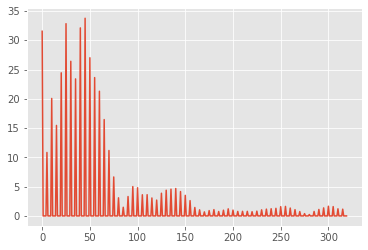

In [130]:
_,_,c=calc_dft(ecg_signal)
plt.plot(c)

In [5]:
#enhanced implementation of the DFT equation
def calc_dft_exp(signal):
    N=int(len(signal))
    c=np.zeros(N,complex)
    n=np.arange(N)
    for k in range(N):
        c[k]=np.sum( signal * np.exp(-2j * np.pi * k * n / N)  )
    return np.abs(c)

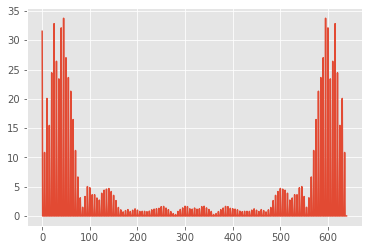

In [139]:
plt.plot(calc_dft_exp(ecg_signal))

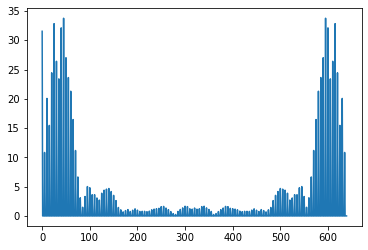

In [6]:
#Fast Fourier Transform FFT
#
#
#fft() Calculates the real and imaginary components
FREQ_COMPONENTS=fft(ecg_signal)
#ifft() calculates the signal from the real and imag components
time_domain=ifft(FREQ_COMPONENTS)
#Calculating the magnitude to show it
magnitude=np.abs(FREQ_COMPONENTS)
#Plot
plt.plot(magnitude)

In [ ]:
#DIGITAL FILTERS

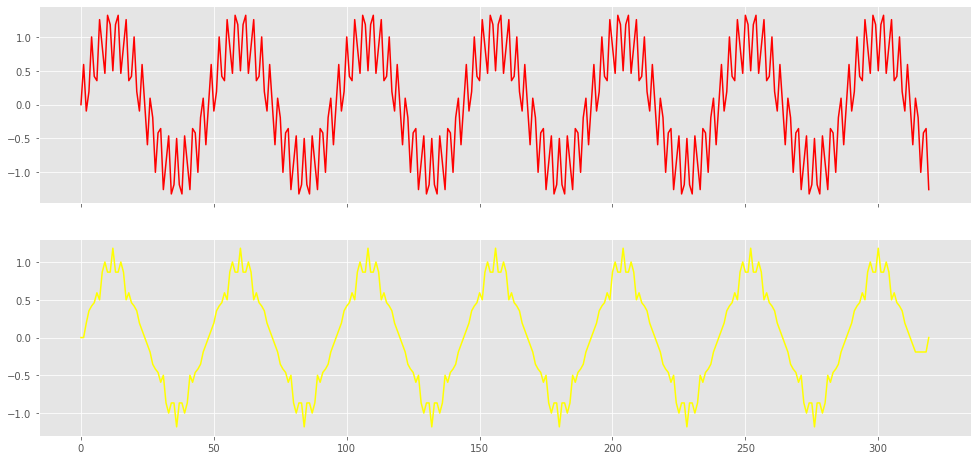

In [8]:
#1. Moving Average filter for signal smoothing and removing noise if the noise is gaussian dist
median_filter_op=signal.medfilt(InputSignal_1kHz_15kHz , 11 )
style.use('ggplot')
f,plt_arr=plt.subplots(2 , sharex=True )
f.tight_layout()
f.set_figheight(7)
f.set_figwidth(15)
plt_arr[0].plot(InputSignal_1kHz_15kHz , color='Red' )
plt_arr[1].plot(median_filter_op , color='yellow')

In [18]:
#FIR Filters
#1. generate signals
t=np.linspace(0,1.0,2001)
#first a 5hz signal
sig_5hz=np.sin(2*np.pi*5*t)
sig_50hz=np.sin(2*np.pi*50*t)
sig_250hz=np.sin(2*np.pi*250*t)
compined=sig_5hz + sig_50hz + sig_250hz
#
numtaps=101
lpf_cutoff=7
hpf_cutoff=100
band_pass_low=40
band_pass_high=100
#Low Pass

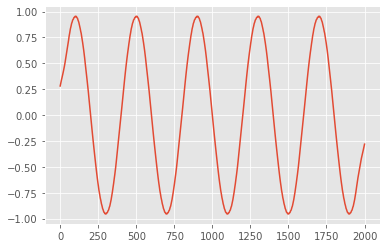

In [19]:
low_pass_coeff=signal.firwin(numtaps , lpf_cutoff , nyq=1000)
low_pass_output=signal.convolve(compined , low_pass_coeff , mode='same')
plt.plot(low_pass_output)

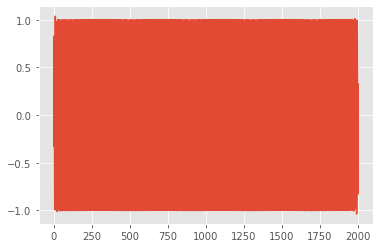

In [22]:
#high_pass
high_pass_coeff=signal.firwin(numtaps , hpf_cutoff ,pass_zero=False , nyq=1000)
high_output=signal.convolve(compined , high_pass_coeff , mode='same')
plt.plot(high_output)

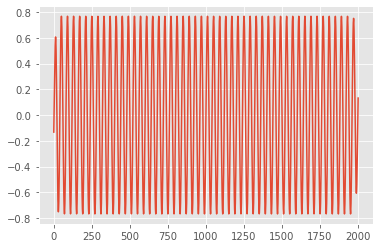

In [25]:
#Bandpass
band_pass_coeff=signal.firwin( numtaps,[band_pass_low , band_pass_high] , pass_zero=False , nyq=1000)
filter_output=signal.convolve(compined , band_pass_coeff,mode='same')
plt.plot(filter_output)

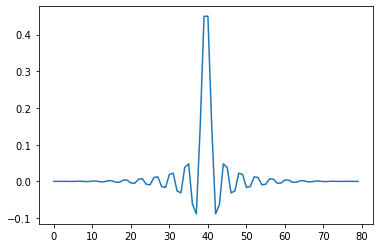

In [4]:
#IIR FILTERS IMPLEMENTAITON
#Recursion or difference equation : y[n] = a0 X[n] + a1 x[n-1] .... +b1 y[n-1] + b2y[n-2]
#Only 12 coeff
#How to find the frequency response of a filter
example=signal.firwin(80 , 0.5 , window =('kaiser' , 8))
plt.plot(example)

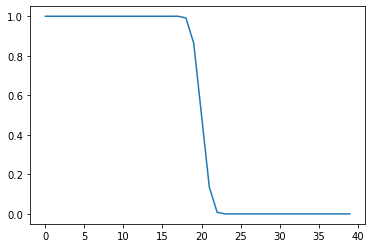

In [9]:
#cut off frequency at?
x,y,mag=calc_dft(example)
plt.plot(mag)

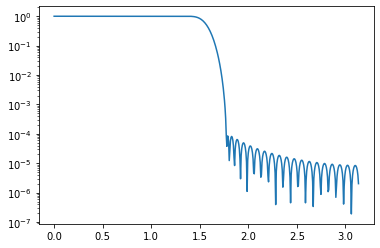

In [10]:
#Frequency responce?
w,h=signal.freqz(example) #returns x , y and y should be in db 
plt.semilogy(w,np.abs(h))

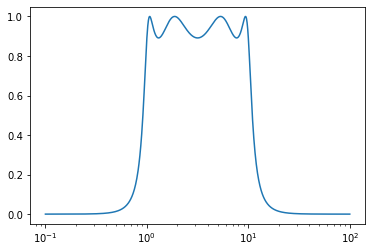

In [12]:
#cheby chev order 1 analog
# iirfilter(numtaps , frequncies in pass band , ripples in pass band , attenuation in stop band , analog=true , ftype is the type of the filter)
x,y=iirfilter(4 , [1,10] , 1 , 60 , analog=True , ftype='cheby1')
x1,y1=signal.freqs(x , y , worN=np.logspace(-1 , 2 ,1000))
plt.semilogx(x1 , abs(y1))

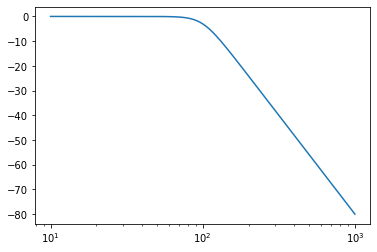

In [3]:
#Butter worth filter
x,y=signal.butter(4 , 100 , 'low' , analog=True)
x1,y1=signal.freqs(x,y)
plt.plot(x1,20*np.log10(abs(y1)))
plt.xscale('log')

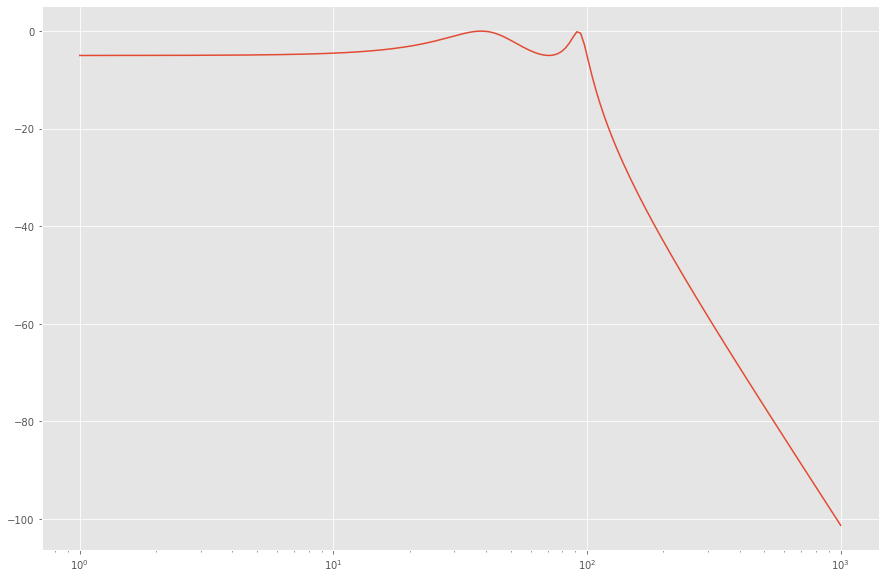

In [12]:
#cheby filter
x,y=signal.cheby1(4 , 5 , 100 , 'low' , analog=True)
x1,y1=signal.freqs(x,y)
plt.figure(figsize=(15,10))
style.use('ggplot')
plt.plot(x1 , 20*np.log10(abs(y1)) )
plt.xscale('log')


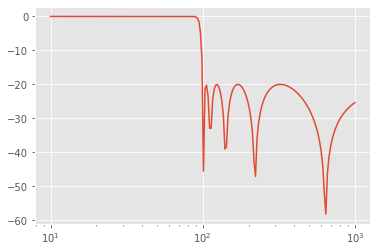

In [16]:
#cheby 2 
x,y=signal.cheby2(10,20 , 100 , 'low' ,analog=True)
x1,y1=signal.freqs(x,y)
plt.plot(x1 , 20 * np.log10(abs(y1)))
plt.xscale('log')

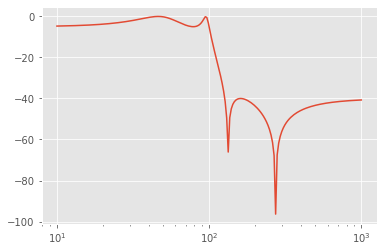

In [20]:
#elliptec
x,y=signal.ellip(4,5,40,100,'low' , analog=True)
x1,y1=signal.freqs(x,y)
plt.plot(x1 , 20*np.log10(abs(y1)))
plt.xscale('log')

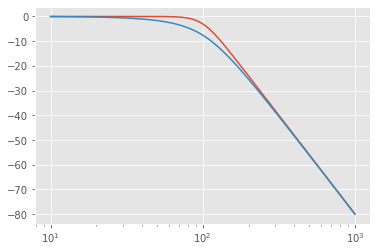

In [23]:
#Bessel filter
x,y=signal.butter(4 , 100 , 'low' , analog=True)
x1,y1=signal.freqs(x,y)
plt.plot(x1,20*np.log10(abs(y1)))
a,b=signal.bessel(4,100,'low' , analog=True)
a1,b1=signal.freqs(a,b)
plt.plot(a1,20*np.log10(abs(b1)))
plt.xscale('log')

In [3]:
#implementing transfer functions
num=[1,3,3]
den=[1,2,1]
#Analog
H1=signal.TransferFunction(num,den)
#Discrete , sr=0.1sec
#H(s)=z^2 +3z+3 / z^2 + 2z +1
H2=signal.TransferFunction(num , den , dt=0.1)

TransferFunctionDiscrete(
array([1., 3., 3.]),
array([1., 2., 1.]),
dt: 0.1
)


In [5]:
#ZeroPolesGain
simple_lti=signal.ZerosPolesGain([1,2] ,[3,4] , 5)
print(simple_lti)
simple_lti_discrete=signal.ZerosPolesGain([1,2] ,[3,4] , 5 , dt=0.1)
print(simple_lti_discrete)

ZerosPolesGainContinuous(
array([1, 2]),
array([3, 4]),
5,
dt: None
)
ZerosPolesGainDiscrete(
array([1, 2]),
array([3, 4]),
5,
dt: 0.1
)


In [6]:
#LTI SYSTEMS
S1=signal.lti([] , [1,1,1] , [5])
x,y=signal.freqresp(S1)

array([], dtype=float64)

<IPython.core.display.Javascript object>


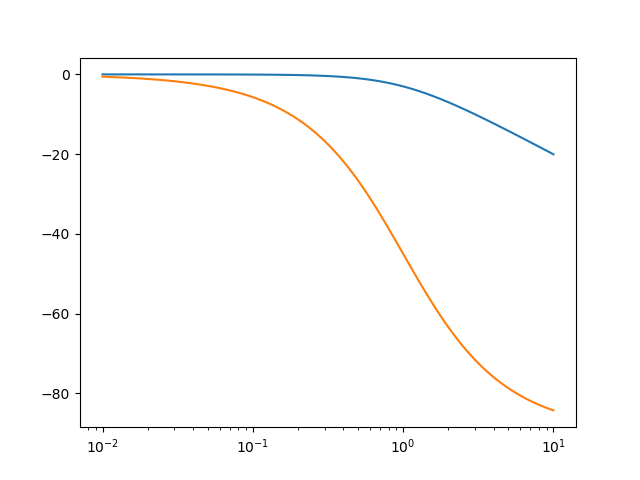

In [4]:
#BODE PLOT
s=signal.lti([1] , [1,1] )
w,mag,phase=s.bode()
plt.semilogx(w,mag)
plt.semilogx(w,phase)


<IPython.core.display.Javascript object>


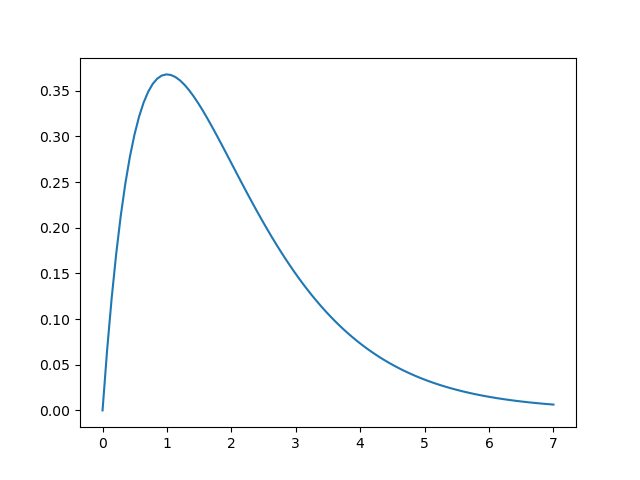

In [8]:
#impulse response
system=([1] , [1,2,1])
x,y=signal.impulse(system)
plt.plot(x,y)

<IPython.core.display.Javascript object>


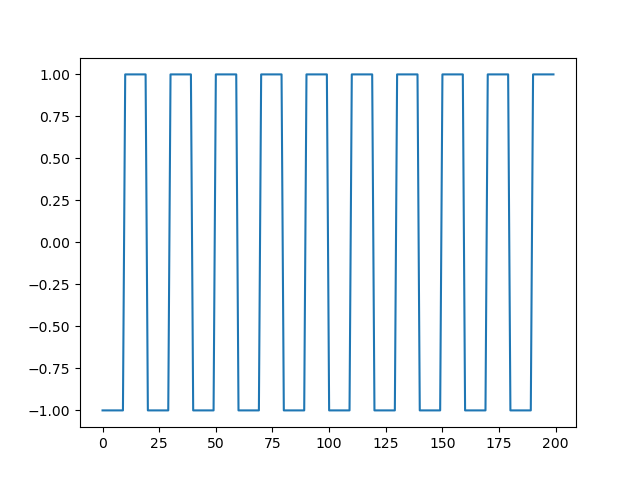

In [22]:
#Square wave
x=[-1,1]
signal=np.repeat(x*10, 10)
plt.plot(signal)

<IPython.core.display.Javascript object>


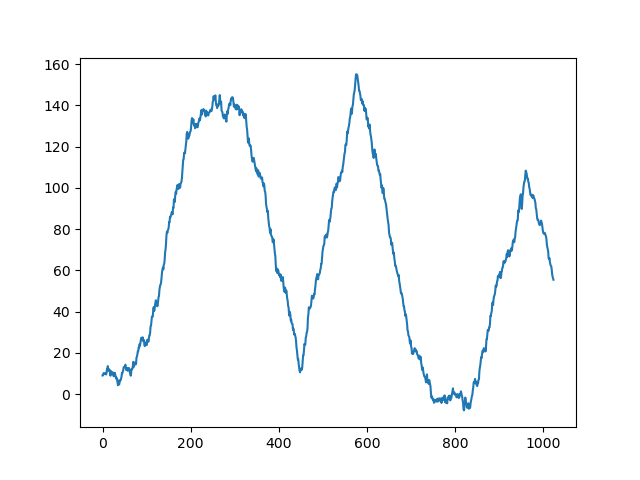

In [34]:
#Digital Signal Identification
signaal=np.repeat([0,1,1,0,1,0,0,1] , 128) 
noise=np.random.randn(len(signaal))
noisy_signal=signaal+noise

rect_pulse=np.ones(128)
corr_signal=signal.correlate(noisy_signal , rect_pulse , mode='same')
